In [23]:
import pandas as pd

In [48]:
import seaborn as sns

In [2]:
import pyspark
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.master('local').appName('Newegg regression').getOrCreate()

In [14]:
df = spark.read.csv('df_final.csv', header=True)

In [19]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- price: string (nullable = true)
 |-- proc_cores: string (nullable = true)
 |-- proc_speed: string (nullable = true)
 |-- mem_cap: string (nullable = true)
 |-- storage_cap: string (nullable = true)
 |-- ssd: string (nullable = true)
 |-- integrated: string (nullable = true)
 |-- nvidia: string (nullable = true)
 |-- ssdcap: string (nullable = true)
 |-- corespeed**2: string (nullable = true)
 |-- ddr4: string (nullable = true)
 |-- ssdddr4: string (nullable = true)
 |-- nvidia_ssd: string (nullable = true)



In [26]:
df_p = pd.read_csv('df_final.csv', index_col=0)

In [27]:
df_p.head()

,price,proc_cores,proc_speed,mem_cap,storage_cap,ssd,integrated,nvidia,ssdcap,corespeed**2,ddr4,ssdddr4,nvidia_ssd
0,930,6.0,3.2,16.0,2048.0,0,0,1,0.0,368.64,1,0,0
1,1050,6.0,3.2,16.0,2048.0,0,0,1,0.0,368.64,1,0,0
2,379,2.0,3.6,4.0,1024.0,0,1,0,0.0,51.84,1,0,0
3,674,4.0,3.1,8.0,256.0,1,1,0,256.0,153.76,1,1,0
4,823,6.0,3.1,16.0,1024.0,0,1,0,0.0,345.96,1,0,0


In [38]:
cols = list(df_p.columns)

In [40]:
df.select(cols).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
price,1703,260.68643570170286,166.43354142515548,100,99
proc_cores,1703,3.4034057545507928,1.348250432350567,1.0,6.0
proc_speed,1703,3.050968878449801,0.33284365836083085,1.5,3.9
mem_cap,1703,7.285965942454492,3.96842225543468,12.0,8.0
storage_cap,1703,942.6870229007634,732.2393835326287,1024.0,80.0
ssd,1703,0.09277745155607751,0.290205529759548,0,1
integrated,1703,0.9718144450968879,0.1655512696823834,0,1
nvidia,1703,0.025836758661186142,0.1586947024612118,0,1
ssdcap,1703,70.45684086905462,351.21956448658347,0.0,512.0


In [51]:
numeric_data = df.select(cols).toPandas()

In [60]:
print(type(df_p))
print(type(numeric_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


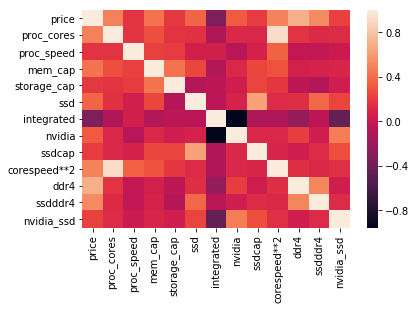

In [58]:
sns.heatmap(df_p.corr())

In [53]:
sns.heatmap(numeric_data.corr())

ValueError: zero-size array to reduction operation minimum which has no identity

In [46]:
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n - 1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

NameError: name 'n' is not defined